<a href="https://colab.research.google.com/github/Sanghun2/NLP_Project/blob/master/%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import re
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd 

files = pd.read_csv('/content/title+content.csv', encoding='CP949', names=['title','contents'])

In [ ]:
content = files['contents']
contents = []

for i in content:
    b = re.sub('[-=+·,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',i)
    b = re.sub('기자|강민수|서울경제|앵커|뉴시스|더팩트','',i)
    contents.append(b)

print(contents)

title = files['title']
titles = []

for i in title:
    b = re.sub('[-=+·,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',i)
    titles.append(b)

print(titles)

[' 이동걸 산업은행 회장과 정몽규 HDC현대산업개발그룹 회장이 만나 꺼져가던 아시아나항공 인수의 불씨를 살려나갔다.26일 두 사람은 서울 모처에서 만나 아시아나항공 인수·합병(M&A)에 대해 1시간 가량 대화를 나눴다. 두 사람의 면담은 이번이 세 번째다.이 회장은 아시아나항공에 이미 지원한 영구채 8000억원 외에 추가적으로 자금을 지원해 HDC현산 측의 인수 부담을 줄여주겠다고 제안한 것으로 전해졌다. 당초 HDC현산은 아시아나항공 대주주인 금호산업이 보유한 구주(舊株)를 사는 데 3228억원을 쓰고, 유상증자를 통해 신주(新株)를 인수하는 데 2조1772억원을 쓰기로 했었다. 아시아나항공 경영 정상화에 쓰일 신주 인수 자금을 산은이 지원하겠다는 뜻이다. 산은은 이날 공식 자료를 통해 “이 회장과 정 회장이 만나 아시아나항공 M&A와 관련해 의견을 나눴다”며 “원만한 종결을 위해 현산측과 인수조건에 대한 모든 가능성을 열어놓고 논의했다”고 밝혔다. “현산측의 답변을 기다릴 것이며 답변 내용에 따라 금호산업 등 매각 주체와 협의해 진행하겠다”는 계획도 덧붙였다. 시장 일각에선 산은이 1조5000억원을 추가 지원한다는 소문도 돌았지만, 산은은 “구체 금액까지 논의되지 않았다”고 부인했다.이 회장은 지난 3일 “매각 결렬 시 모든 책임을 지라”며 최후통첩까지 날리면서 배수의 진(陣)을 쳤다. 이 회장은 “HDC현산의 아시아나항공 재실사 제안을 받아들일 수 없고, 11일까지 인수 결정을 내리지 않으면 계약을 해지하겠다”며 정 회장을 압박했다. 묵묵부답이었던 정 회장은 지난 7일 아시아나항공의 2분기 흑자 소식이 나오자 계약 해지 이틀을 앞둔 지난 9일 극적으로 대면 회담을 수락했다. 이로써 “노딜(인수 무산)이 벌어질 것”이라던 시장의 우려는 일단 잠잠해졌다. 그러나 채권단은 정 회장이 이 회장의 제안마저 거부할 경우 매각이 무산될 가능성이 큰 것으로 보고 있다. 그렇게 되면 채권단은 보유하고 있는 영구채를 주식으로 전환한 뒤, 경영 정상화를 거쳐 재매각하는 ‘

In [ ]:
d = {'titles':titles, 'contents':contents}
par_corp = pd.DataFrame(d)

In [ ]:
par_corp

titles                                           contents
0           아시아나 인수 불씨 되살리나 이동걸 정몽규 전격 회동     이동걸 산업은행 회장과 정몽규 HDC현대산업개발그룹 회장이 만나 꺼져가던 아시아나...
1           “1조 깎아준다” 이동걸 파격제안에 장고 들어간 현산    [ ] 이동걸 산업은행 회장과 정몽규 HDC현대산업개발 회장이 26일 전격 회동하며...
2           모든 가능성  승부수 던진 산은 정몽규 최종 선택은     파국으로 치닫던 아시아나항공 인수합병이 새로운 국면을 맞았다. 채권단인 산업은행이 ...
3            아시아나 놓고 최종 담판  모든 가능성 열고 논의     [ ] 아시아나항공을 인수를 놓고 채권단인 산업은행 이동걸 회장과 정몽규 HDC그룹...
4       정몽규 만난 이동걸의 돌직구  아시아나 원하는 조건 말하라     이동걸 산업은행 회장이 정몽규 HDC그룹 회장을 만나 "재협의에 임할테니 답을 달라...
..                                      ...                                                ...
168        LG헬로비전  대학생  언택트직무 멘토링’ 비대면 진행    [서울= ] 이재은   = LG헬로비전임직원들이 지역 대학생들을 위한 ‘언택트취업 ...
169           LG헬로비전  대학생  언택트 직무 멘토링’ 진행    [아시아경제 구채은  ] 26일 서울에서 열렸고, 28일 부산에서 개최될 이번 프로...
170              서울시 LG헬로비전  랜선 직무 멘토링 개최    [서울= ] 윤슬기   = 서울시자원봉사센터(센터장 김의욱)와 LG헬로비전(대표이사...
171    서울시 LG헬로비전  취업준비생들을 위한  랜선 직무 멘토링     [아시아경제 조인경  ] 서울시자원봉사센터가 신종 코로나바이러스감염증(코로나19) ...
172                 서울시 LG헬로비전  직무 멘토링 개최    [파이낸셜뉴스] 서울시자원봉사센터는 LG헬로비전 서울 본사 및 부산 지사 임직원 1...

[173 rows x 2 columns]

In [ ]:
encoder_input, decoder_input, decoder_output = [], [], []
for stc in par_corp['contents']:
    encoder_input.append(stc.split())
for stc in par_corp['titles']:
    decoder_input.append(("<start> "+stc).split())
for stc in par_corp['titles']:
    decoder_output.append((stc+" <end>").split())

In [ ]:
print(encoder_input[:3])
print(decoder_input[:3])
print(decoder_output[:3])

[['이동걸', '산업은행', '회장과', '정몽규', 'HDC현대산업개발그룹', '회장이', '만나', '꺼져가던', '아시아나항공', '인수의', '불씨를', '살려나갔다.26일', '두', '사람은', '서울', '모처에서', '만나', '아시아나항공', '인수·합병(M&A)에', '대해', '1시간', '가량', '대화를', '나눴다.', '두', '사람의', '면담은', '이번이', '세', '번째다.이', '회장은', '아시아나항공에', '이미', '지원한', '영구채', '8000억원', '외에', '추가적으로', '자금을', '지원해', 'HDC현산', '측의', '인수', '부담을', '줄여주겠다고', '제안한', '것으로', '전해졌다.', '당초', 'HDC현산은', '아시아나항공', '대주주인', '금호산업이', '보유한', '구주(舊株)를', '사는', '데', '3228억원을', '쓰고,', '유상증자를', '통해', '신주(新株)를', '인수하는', '데', '2조1772억원을', '쓰기로', '했었다.', '아시아나항공', '경영', '정상화에', '쓰일', '신주', '인수', '자금을', '산은이', '지원하겠다는', '뜻이다.', '산은은', '이날', '공식', '자료를', '통해', '“이', '회장과', '정', '회장이', '만나', '아시아나항공', 'M&A와', '관련해', '의견을', '나눴다”며', '“원만한', '종결을', '위해', '현산측과', '인수조건에', '대한', '모든', '가능성을', '열어놓고', '논의했다”고', '밝혔다.', '“현산측의', '답변을', '기다릴', '것이며', '답변', '내용에', '따라', '금호산업', '등', '매각', '주체와', '협의해', '진행하겠다”는', '계획도', '덧붙였다.', '시장', '일각에선', '산은이', '1조5000억원을', '추가', '지원한다는', '소문도', '돌았지만,', '산은은', '“구체', '금액까지', '논의되지', '않았다

In [ ]:
tokenizer_C = Tokenizer()
tokenizer_C.fit_on_texts(encoder_input)
encoder_input = tokenizer_C.texts_to_sequences(encoder_input)

# 1~4999(패딩하기 전) -> 0~4999(패딩하고 난 뒤)
tokenizer_T = Tokenizer()
tokenizer_T.fit_on_texts(decoder_input)
tokenizer_T.fit_on_texts(decoder_output)

# 정수 인코딩할 때는 1부터 인덱스를 부여
decoder_input = tokenizer_T.texts_to_sequences(decoder_input)
decoder_output = tokenizer_T.texts_to_sequences(decoder_output)

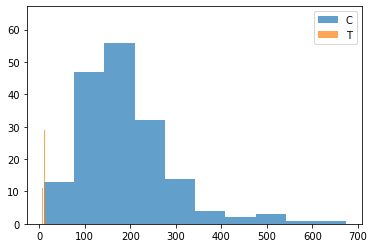

In [ ]:
# 문장 길이 체크
import matplotlib.pyplot as plt

len_C = []
for data in encoder_input:
    len_C.append(len(data))

len_T = []
for data in decoder_input:
    len_T.append(len(data))

plt.hist(len_C, label='C', alpha=0.7)
plt.hist(len_T, label='T', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
# maxlen 없어도 알아서 잘 패딩합니다
encoder_input = pad_sequences(encoder_input, padding="post")
decoder_input = pad_sequences(decoder_input, padding="post")
decoder_output = pad_sequences(decoder_output, padding="post")

In [ ]:
print(encoder_input.shape)
print(decoder_input.shape)

(173, 675)
(173, 14)


In [ ]:
print(encoder_input[:3])
print(decoder_input[:3])
print(decoder_output[:3])

[[  35   61   18 ...    0    0    0]
 [ 848   35   61 ...    0    0    0]
 [3591 3592    3 ...    0    0    0]]
[[  1   6  20 118 180   3   5 181  47   0   0   0   0   0]
 [  1 119 182   3 183 184 185  63   0   0   0   0   0   0]
 [  1  25  18 120 186  37   5  32 187   0   0   0   0   0]]
[[  6  20 118 180   3   5 181  47   2   0   0   0   0   0]
 [119 182   3 183 184 185  63   2   0   0   0   0   0   0]
 [ 25  18 120 186  37   5  32 187   2   0   0   0   0   0]]


In [ ]:
# 나중에 prediction 할때 사용하기 위함 (인덱스로 단어 찾기)
C_to_index = tokenizer_C.word_index
index_to_C = tokenizer_C.index_word

In [ ]:
# 3:1로 나눴습니다
test_size = 43
encoder_input_train = encoder_input[:-test_size]
decoder_input_train = decoder_input[:-test_size]
decoder_output_train = decoder_output[:-test_size]

encoder_input_test = encoder_input[-test_size:]
decoder_input_test = decoder_input[-test_size:]
decoder_output_test = decoder_output[-test_size:]